# Analysing Health Data

### Health Care Analytics
The utilization of massive volumes of collected data to offer enterprises with
meaningful insights is referred to as healthcare analytics. To drive fact-based
decision making, these insights are created through analytical disciplines. As a result
of these decisions, planning, management, measurement, and learning are all
improved. Analytics will become increasingly crucial as healthcare companies
throughout the world struggle to save costs, increase coordination with care teams,
give more with less, and focus on enhancing patient care.

Now, we import all the necessary libraries we need to analyse health data with python:

In [79]:
#we import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

Now let's read the data and take a quick look at some first lines from the data:

In [80]:
df = pd.read_csv("Health Care Analytics.csv")
df.head()

,Registered ID,Hospital Code,Extra Rooms,Department,Ward Type,Bed Grade,Patient ID,Type of Registration,Ilness Intensity,Number of Visitors,Age,A deposit for registration,Stays Days
0,1,8,3,radiotherapy,R,2.0,31397,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,2,radiotherapy,S,2.0,31397,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,2,anesthesia,S,2.0,31397,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,2,radiotherapy,R,2.0,31397,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,2,radiotherapy,S,2.0,31397,Trauma,Extreme,2,51-60,5558.0,41-50


To browse the statistics quickly, we need to use a few definition functions:

In [81]:
df.shape

(318438, 13)

In [82]:
df.dtypes

Registered ID                   int64
Hospital Code                   int64
Extra Rooms                     int64
Department                     object
Ward Type                      object
Bed Grade                     float64
Patient ID                      int64
Type of Registration           object
Ilness Intensity               object
Number of Visitors              int64
Age                            object
A deposit for registration    float64
Stays Days                     object
dtype: object

In [83]:
df.isnull().sum()

Registered ID                   0
Hospital Code                   0
Extra Rooms                     0
Department                      0
Ward Type                       0
Bed Grade                     113
Patient ID                      0
Type of Registration            0
Ilness Intensity                0
Number of Visitors              0
Age                             0
A deposit for registration      0
Stays Days                      0
dtype: int64

In [84]:
# Getting descriptive statistics for numerical columns
descriptive_stats = df.describe()

# For categorical data, we'll get the count of unique values in each column
categorical_counts = df.select_dtypes(include=['object']).nunique()

descriptive_stats, categorical_counts

(       Registered ID  ...  A deposit for registration
 count  318438.000000  ...               318438.000000
 mean   159219.500000  ...                 4880.749392
 std     91925.276848  ...                 1086.776254
 min         1.000000  ...                 1800.000000
 25%     79610.250000  ...                 4186.000000
 50%    159219.500000  ...                 4741.000000
 75%    238828.750000  ...                 5409.000000
 max    318438.000000  ...                11008.000000
 
 [8 rows x 7 columns],
 Department               5
 Ward Type                6
 Type of Registration     3
 Ilness Intensity         3
 Age                     10
 Stays Days              11
 dtype: int64)

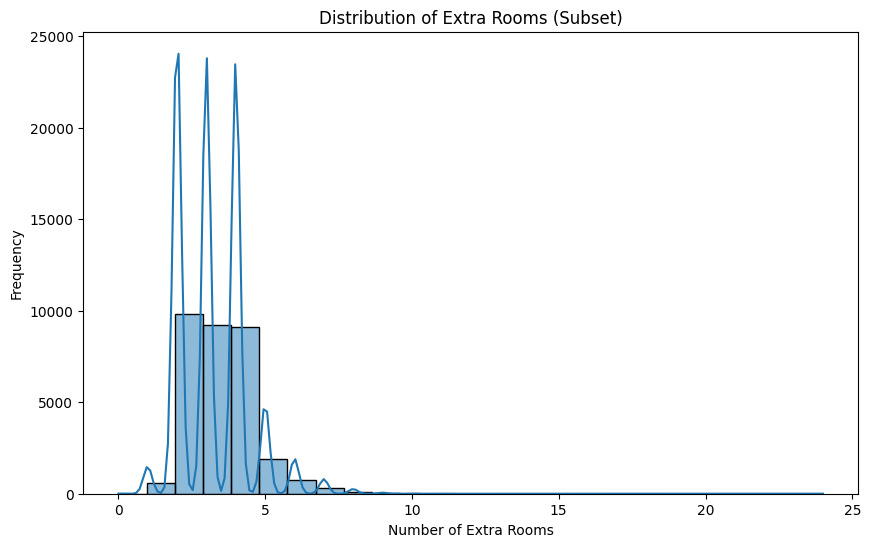

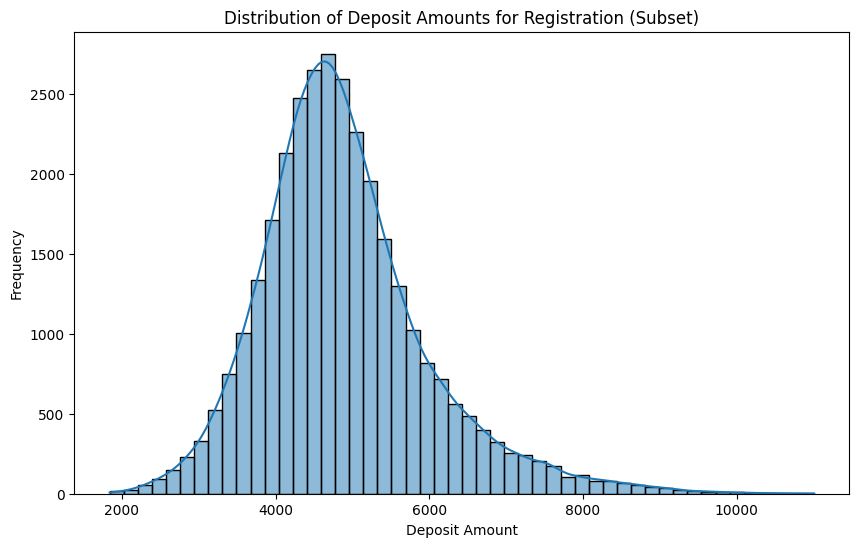

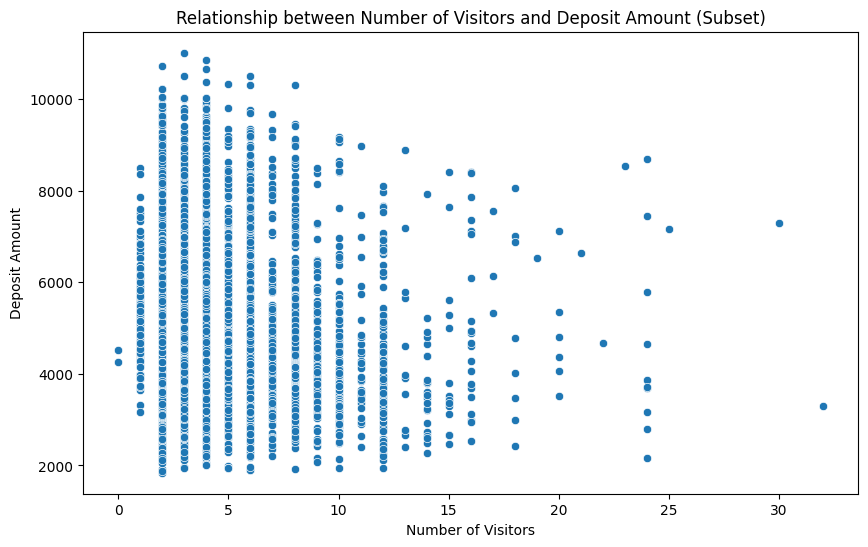

In [85]:
# Trying a subset of the data to avoid performance issues
subset_data = df.sample(frac=0.1, random_state=1)

# Visualizing the distribution of the number of extra rooms on subset
plt.figure(figsize=(10, 6))
sns.histplot(subset_data['Extra Rooms'], kde=True, bins=25)
plt.title('Distribution of Extra Rooms (Subset)')
plt.xlabel('Number of Extra Rooms')
plt.ylabel('Frequency')
plt.show()

# Visualizing the distribution of deposit amounts for registration on subset
plt.figure(figsize=(10, 6))
sns.histplot(subset_data['A deposit for registration'], kde=True, bins=50)
plt.title('Distribution of Deposit Amounts for Registration (Subset)')
plt.xlabel('Deposit Amount')
plt.ylabel('Frequency')
plt.show()

# Scatterplot between 'Number of Visitors' and 'A deposit for registration' on subset
plt.figure(figsize=(10, 6))
sns.scatterplot(x=subset_data['Number of Visitors'], y=subset_data['A deposit for registration'])
plt.title('Relationship between Number of Visitors and Deposit Amount (Subset)')
plt.xlabel('Number of Visitors')
plt.ylabel('Deposit Amount')
plt.show()


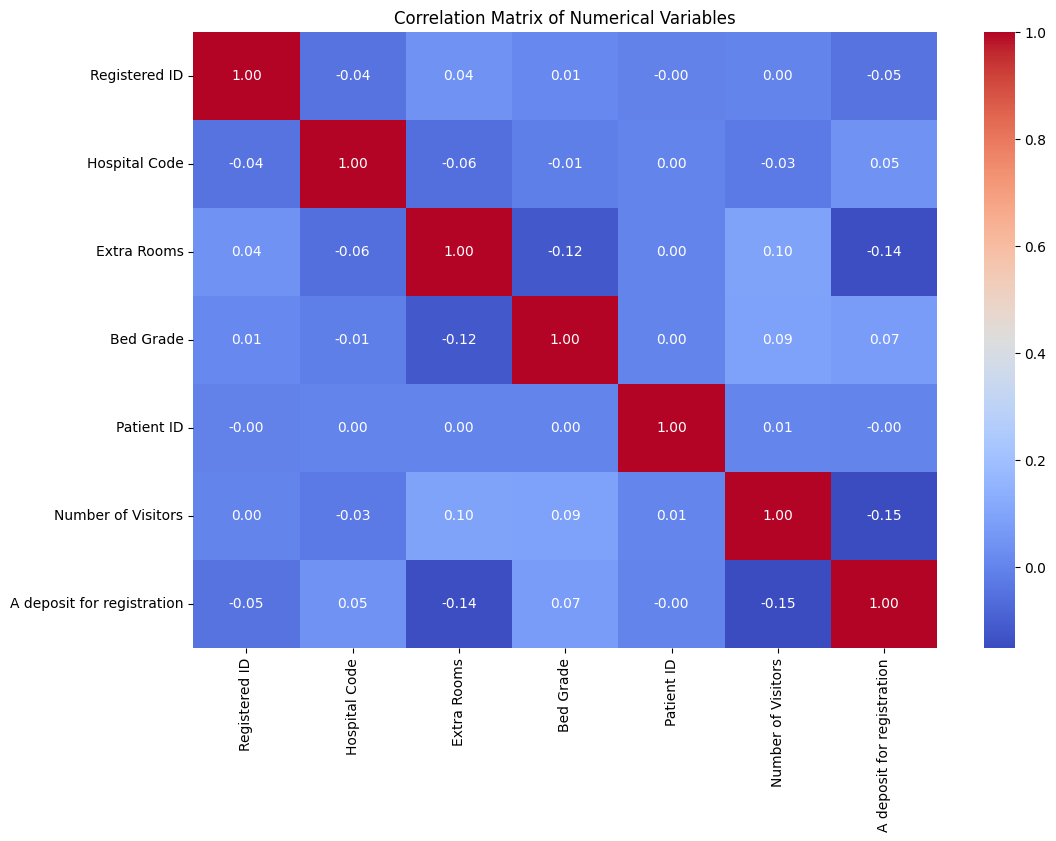

In [86]:
# Calculating the correlation matrix for the numerical variables
correlation_matrix = df.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


In [87]:
# Calculating the correlation matrix for the numerical variables without visualization
correlation_matrix = df.corr()
correlation_matrix


,Registered ID,Hospital Code,Extra Rooms,Bed Grade,Patient ID,Number of Visitors,A deposit for registration
Registered ID,1.000000,-0.043023,0.042580,0.013702,-0.004150,0.001309,-0.045972
Hospital Code,-0.043023,1.000000,-0.059638,-0.013739,0.002291,-0.028500,0.045446
Extra Rooms,0.042580,-0.059638,1.000000,-0.115868,0.000921,0.096714,-0.143739
Bed Grade,0.013702,-0.013739,-0.115868,1.000000,0.001645,0.088945,0.073833
Patient ID,-0.004150,0.002291,0.000921,0.001645,1.000000,0.006889,-0.000877
Number of Visitors,0.001309,-0.028500,0.096714,0.088945,0.006889,1.000000,-0.150358
A deposit for registration,-0.045972,0.045446,-0.143739,0.073833,-0.000877,-0.150358,1.000000


In [88]:
# Selecting a smaller subset of the data to avoid memory issues
# We will use 5% of the data to ensure it fits into memory comfortably
subset_data = df.sample(frac=0.05, random_state=42)

# Calculating the correlation matrix for the numerical variables in the subset
subset_correlation_matrix = subset_data.corr()
subset_correlation_matrix


,Registered ID,Hospital Code,Extra Rooms,Bed Grade,Patient ID,Number of Visitors,A deposit for registration
Registered ID,1.000000,-0.054851,0.034314,0.014605,0.007180,-0.001394,-0.048490
Hospital Code,-0.054851,1.000000,-0.061712,-0.013218,-0.013249,-0.021610,0.048448
Extra Rooms,0.034314,-0.061712,1.000000,-0.119652,0.000224,0.096354,-0.140274
Bed Grade,0.014605,-0.013218,-0.119652,1.000000,-0.010749,0.077378,0.079791
Patient ID,0.007180,-0.013249,0.000224,-0.010749,1.000000,0.002118,-0.006140
Number of Visitors,-0.001394,-0.021610,0.096354,0.077378,0.002118,1.000000,-0.148467
A deposit for registration,-0.048490,0.048448,-0.140274,0.079791,-0.006140,-0.148467,1.000000


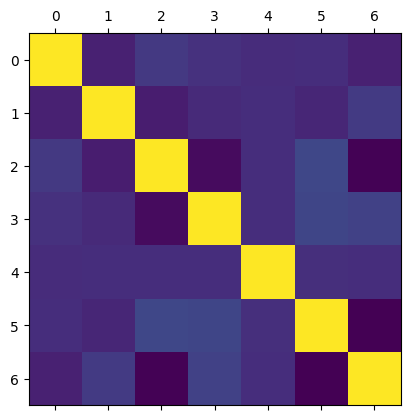

In [89]:
# Let's analyse the correlations of the variables
plt.matshow(df.corr())
plt.show()


# Handling Missing Values

In [90]:
# We will first check the percentage of missing values for each column.
missing_percentage = (subset_data.isnull().sum() / len(subset_data)) * 100

# For columns with missing values, we will fill them with the median value of that column.
for column in subset_data.columns:
    if subset_data[column].isnull().any():
        subset_data[column].fillna(subset_data[column].median(), inplace=True)

# Re-checking if all missing values are filled
recheck_missing = subset_data.isnull().sum()

missing_percentage, recheck_missing

(Registered ID                 0.000000
 Hospital Code                 0.000000
 Extra Rooms                   0.000000
 Department                    0.000000
 Ward Type                     0.000000
 Bed Grade                     0.006281
 Patient ID                    0.000000
 Type of Registration          0.000000
 Ilness Intensity              0.000000
 Number of Visitors            0.000000
 Age                           0.000000
 A deposit for registration    0.000000
 Stays Days                    0.000000
 dtype: float64,
 Registered ID                 0
 Hospital Code                 0
 Extra Rooms                   0
 Department                    0
 Ward Type                     0
 Bed Grade                     0
 Patient ID                    0
 Type of Registration          0
 Ilness Intensity              0
 Number of Visitors            0
 Age                           0
 A deposit for registration    0
 Stays Days                    0
 dtype: int64)

# Data Cleaning

In [91]:
# Identifying any outlier or inconsistent entries and handling them

# For simplicity, we will only check for outliers in numeric columns using IQR (Interquartile Range)
numeric_columns = subset_data.select_dtypes(include=['int64', 'float64']).columns

# Defining a function to find and remove outliers using IQR
def remove_outliers(df, column_list):
    for column in column_list:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Applying the function to the data
subset_data_clean = remove_outliers(subset_data, numeric_columns)

# Checking the shape of the data before and after outlier removal to see how many outliers were removed
original_shape = subset_data.shape
clean_shape = subset_data_clean.shape

original_shape, clean_shape

((15922, 13), (14794, 13))

In [92]:
# Calculates descriptive statistics of numeric columns
numerical_descriptive_stats = subset_data_clean.describe()
print(numerical_descriptive_stats)

       Registered ID  ...  A deposit for registration
count   14794.000000  ...                14794.000000
mean   158060.055157  ...                 4797.305800
std     91464.242426  ...                  881.216138
min         8.000000  ...                 2417.000000
25%     78692.750000  ...                 4198.000000
50%    158042.500000  ...                 4728.000000
75%    237229.500000  ...                 5335.750000
max    318367.000000  ...                 7228.000000

[8 rows x 7 columns]


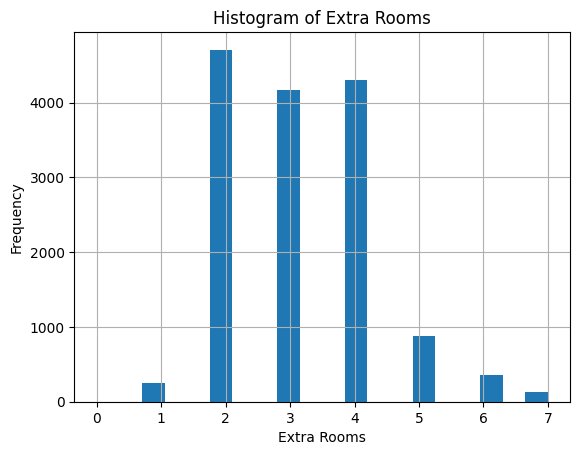

In [93]:
# Histogram for numerical data
subset_data_clean['Extra Rooms'].hist(bins=20)
plt.title('Histogram of Extra Rooms')
plt.xlabel('Extra Rooms')
plt.ylabel('Frequency')
plt.show()

In [94]:
# Calculate descriptive statistics of categorical columns
categorical_descriptive_stats = subset_data_clean.select_dtypes(include=['object']).describe()
print(categorical_descriptive_stats)


        Department Ward Type  ...    Age Stays Days
count        14794     14794  ...  14794      14794
unique           5         5  ...     10         11
top     gynecology         R  ...  31-40      21-30
freq         11754      6043  ...   2993       4153

[4 rows x 6 columns]


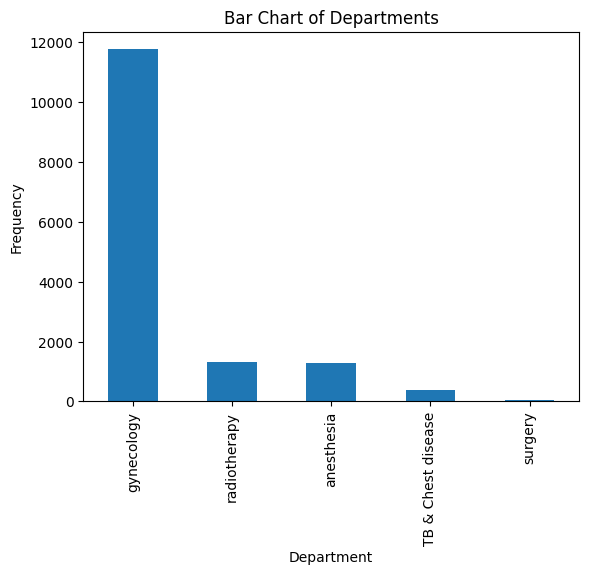

In [95]:
# Bar chart for categorical data
if not subset_data_clean['Department'].empty:
    subset_data_clean['Department'].value_counts().plot(kind='bar')
    plt.title('Bar Chart of Departments')
    plt.xlabel('Department')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("The 'Department' column is empty.")
    
    plt.show()

# Feature Engineering


In [96]:
# Creating new features or transforming existing ones to improve the dataset for modeling.

# As an example of feature engineering, we might want to convert categorical data to numerical using encoding,
# or create new features from existing ones that could have a meaningful impact on analysis.
# For this dataset, let's create a new feature that groups 'Age' into a numerical category.

# Function to convert age range to a numerical category
def age_to_category(age_range):
    if age_range == '0-10':
        return 0
    elif age_range == '11-20':
        return 1
    elif age_range == '21-30':
        return 2
    elif age_range == '31-40':
        return 3
    elif age_range == '41-50':
        return 4
    elif age_range == '51-60':
        return 5
    elif age_range == '61-70':
        return 6
    elif age_range == '71-80':
        return 7
    elif age_range == '81-90':
        return 8
    elif age_range == '91-100':
        return 9
    else:
        return None

# Applying the function to the 'Age' column
subset_data_clean['Age Category'] = subset_data_clean['Age'].apply(age_to_category)

# Verifying the transformation
subset_data_clean[['Age', 'Age Category']].head()


,Age,Age Category
245328,41-50,4
239123,41-50,4
280646,41-50,4
89025,51-60,5
517,71-80,7


# Basic Statistical Analysis


In [97]:
# We will conduct basic statistical analysis on the clean subset of the data.

# Descriptive statistics for numerical columns
descriptive_stats_subset = subset_data_clean.describe()

# Descriptive statistics for categorical columns
categorical_columns = subset_data_clean.select_dtypes(include=['object']).columns
descriptive_stats_categorical = subset_data_clean[categorical_columns].describe()

descriptive_stats_subset, descriptive_stats_categorical


(       Registered ID  Hospital Code  ...  A deposit for registration  Age Category
 count   14794.000000   14794.000000  ...                14794.000000  14794.000000
 mean   158060.055157      18.427606  ...                 4797.305800      4.119913
 std     91464.242426       8.607106  ...                  881.216138      1.890665
 min         8.000000       1.000000  ...                 2417.000000      0.000000
 25%     78692.750000      11.000000  ...                 4198.000000      3.000000
 50%    158042.500000      19.000000  ...                 4728.000000      4.000000
 75%    237229.500000      26.000000  ...                 5335.750000      5.000000
 max    318367.000000      32.000000  ...                 7228.000000      9.000000
 
 [8 rows x 8 columns],
         Department Ward Type  ...    Age Stays Days
 count        14794     14794  ...  14794      14794
 unique           5         5  ...     10         11
 top     gynecology         R  ...  31-40      21-30
 freq  

# Modelling

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Divide the data set into training and test sets
X = subset_data_clean.drop("Bed Grade", axis=1)  
y = subset_data_clean["Bed Grade"]

# Check if the dataset has enough samples
if len(X) > 0:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scaling properties
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=[float, int]))
    X_test_scaled = scaler.transform(X_test.select_dtypes(include=[float, int]))
else:
    print("Error: The dataset does not have enough samples.")

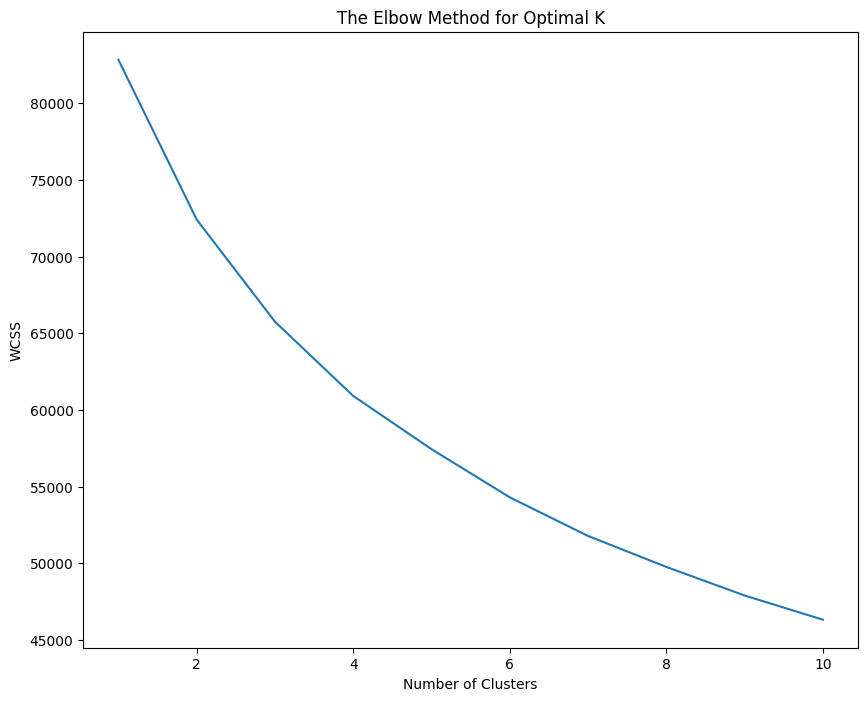

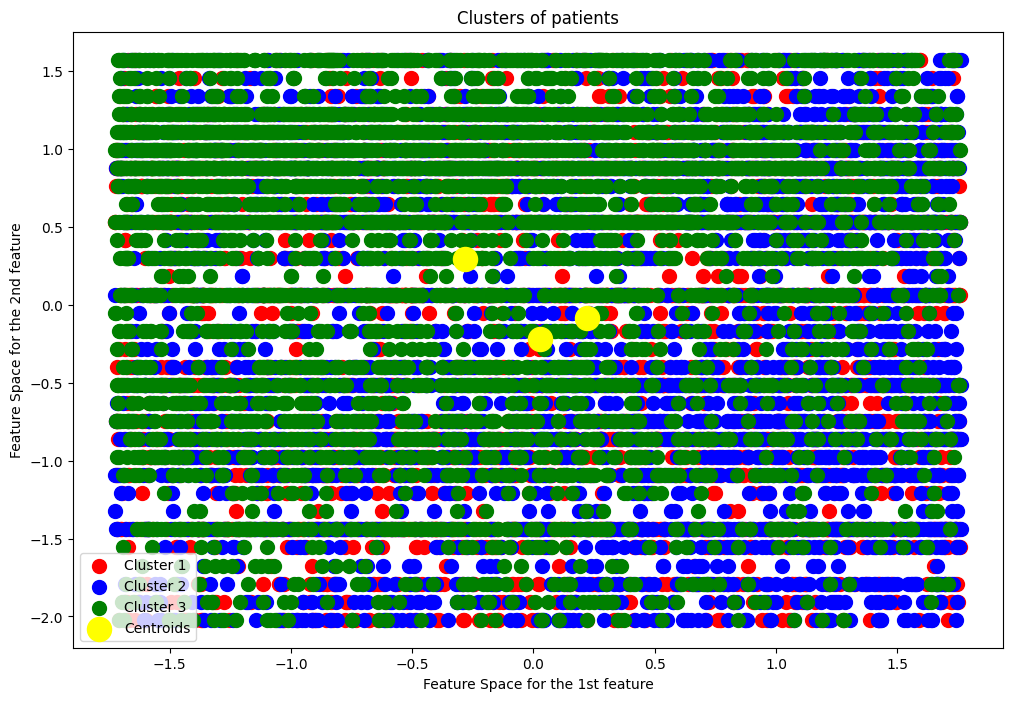

In [99]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Determine the optimal number of clusters (K) using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

# Plot the results of the elbow method
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()

# Let's assume the optimal number of clusters K is 3 based on the elbow method
optimal_k = 3

# Apply K-Means to the training data
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_train_scaled)

# Visualize the clusters
plt.figure(figsize=(12, 8))
plt.scatter(X_train_scaled[y_kmeans == 0, 0], X_train_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_train_scaled[y_kmeans == 1, 0], X_train_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_train_scaled[y_kmeans == 2, 0], X_train_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of patients')
plt.xlabel('Feature Space for the 1st feature')
plt.ylabel('Feature Space for the 2nd feature')
plt.legend()
plt.show()


## Analysis of Clustering Results

In [100]:
# Finding the centre of each set
cluster_centers = kmeans.cluster_centers_

# Creating a DataFrame to examine centres and frequency distributions
cluster_centers_df = pd.DataFrame(cluster_centers)
print(cluster_centers_df)

          0         1         2         3         4         5         6
0  0.025435 -0.221348  0.469047  0.023971  1.090625 -0.656979  0.140547
1  0.221221 -0.082587  0.166698 -0.020594 -0.543297  0.061436 -0.789373
2 -0.283897  0.292404 -0.609798  0.003253 -0.317436  0.505481  0.809481


## Review and Refinement of the Model

In [101]:
# Testing the model for different numbers of clusters
for k in range(2, 10):
    kmeans_test = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_test.fit(X_train_scaled)
    print(f'K={k}, Inertia={kmeans_test.inertia_}')


K=2, Inertia=72423.5282158984
K=3, Inertia=65759.94030914246
K=4, Inertia=60917.156312262254
K=5, Inertia=57446.95617229516
K=6, Inertia=54305.452441172274
K=7, Inertia=51785.716517640765
K=8, Inertia=49766.21524003923
K=9, Inertia=47902.6398717107
